In [1]:
import pandas as pd
df = pd.read_csv('../data/balanced_dataset/balanced.csv')
df.tail()

,Score,Summary
99995,5,product great packaging from amazoncom not
99996,5,gluten free all purpose flour
99997,5,i really like it handling gas issues
99998,5,pamelas flours are great
99999,5,fantastic bread you would never know it is gf


In [2]:
print(df.isnull().sum())


Score      0
Summary    0
dtype: int64


In [3]:
print("Unique Score values:", df['Score'].unique())
print(df['Score'].value_counts())

Unique Score values: [5 1 4 3 2]
Score
5    59836
4    15997
1     9286
3     9060
2     5821
Name: count, dtype: int64


Advance preprocessing

In [4]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and normalize text
def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs and HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # URLs
    text = re.sub(r'<.*?>', '', text)                    # HTML
    
    # 3. Remove emojis and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)                  # punctuation
    text = re.sub(r'[\d_]', '', text)                    # numbers and underscores
    text = re.sub(r'\s+', ' ', text).strip()             # extra spaces
    
    # 4. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 6. Lemmatize (convert words to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 7. Rejoin tokens
    cleaned_text = ' '.join(tokens)
    return cleaned_text


# Apply cleaning to your dataset
df['Cleaned_summary'] = df['Summary'].astype(str).apply(clean_text)

# ✅ Remove any remaining numbers (like "2" in "2 good product")
df['Cleaned_summary'] = df['Cleaned_summary'].apply(lambda x: re.sub(r'\d+', '', x))

# 8. Filter out reviews with <3 words or extremely long text (>150 words)
df = df[df['Cleaned_summary'].apply(lambda x: len(x.split()) >= 3)]
df = df[df['Cleaned_summary'].apply(lambda x: len(x.split()) <= 150)]

print("⭐ Remaining samples after cleaning:", len(df))
df[['Cleaned_summary', 'Score']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


⭐ Remaining samples after cleaning: 76816


,Cleaned_summary,Score
0,good quality dog food,5
3,great good expensive brand,5
4,wonderful tasty taffy,5
5,healthy dog food,5
6,best hot sauce world,5


we have 2000+ samples per Score, so we stop taking samples from cleaned

In [5]:
print("Unique Score values:", df['Score'].unique())
print(df['Score'].value_counts())

Unique Score values: [5 1 4 3 2]
Score
5    47258
4    12566
1     6628
3     6429
2     3935
Name: count, dtype: int64


making balanced dataset and saving


In [6]:
balanced_df = (
    df.groupby('Score', group_keys=False)
      .apply(lambda x: x.sample(n=3000, random_state=42))
      .reset_index(drop=True)
)

C:\Users\91940\AppData\Local\Temp\ipykernel_1400\1670867275.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=3000, random_state=42))


In [7]:

df[['Cleaned_summary', 'Score']].head()

,Cleaned_summary,Score
0,good quality dog food,5
3,great good expensive brand,5
4,wonderful tasty taffy,5
5,healthy dog food,5
6,best hot sauce world,5


In [8]:
balanced_df[['Cleaned_summary', 'Score']].to_csv("../data/balanced_dataset/proper_balanced.csv", index=False)

importing saved dataset to see it is proper balanced dataset

In [9]:
import pandas as pd
df = pd.read_csv('../data/balanced_dataset/proper_balanced.csv')
df.tail()

,Cleaned_summary,Score
14995,high quality tea,5
14996,great hot chocolate wa bit spice,5
14997,taste like home,5
14998,fantastic house plant,5
14999,best candy planet,5


In [10]:
print("Unique Score values:", df['Score'].unique())
print(df['Score'].value_counts())

Unique Score values: [1 2 3 4 5]
Score
1    3000
2    3000
3    3000
4    3000
5    3000
Name: count, dtype: int64


bar chart of review counts per rating

C:\Users\91940\AppData\Local\Temp\ipykernel_1400\1262634684.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


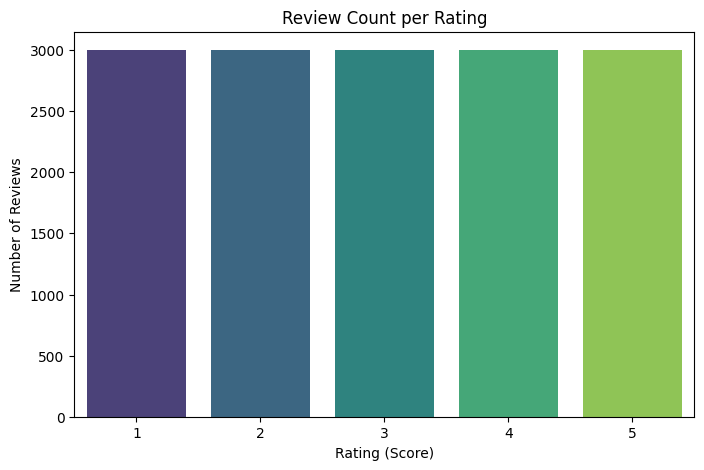

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- Step 1: Bar plot — review count per rating ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title("Review Count per Rating")
plt.xlabel("Rating (Score)")
plt.ylabel("Number of Reviews")
plt.show()

 Histogram of word count distribution 

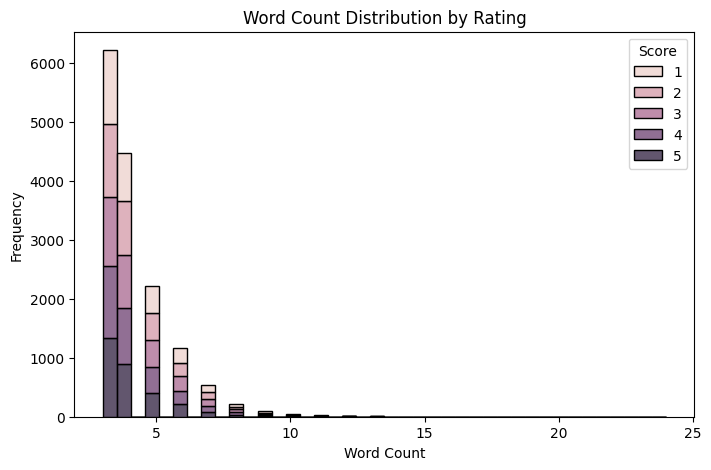

In [12]:
# Ensure word_count column exists (use cleaned_summary)
if 'word_count' not in df.columns:
	df['word_count'] = df['Cleaned_summary'].astype(str).str.split().apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='word_count', hue='Score', multiple='stack', bins=40)
plt.title("Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [13]:
for score in sorted(df['Score'].unique()):
    print(f"\n📊 Rating {score} — Sample Reviews:")
    samples = df[df['Score'] == score]['Cleaned_summary'].head(5)  # change 5 to any number between 3–10
    for i, review in enumerate(samples, start=1):
        print(f"{i}. {review}\n{'-'*80}")


📊 Rating 1 — Sample Reviews:
1. hydrogenated vegetable oil thanks
--------------------------------------------------------------------------------
2. rotten peanut butter
--------------------------------------------------------------------------------
3. cant taste anything
--------------------------------------------------------------------------------
4. vita coconut water
--------------------------------------------------------------------------------
5. dont buy company
--------------------------------------------------------------------------------

📊 Rating 2 — Sample Reviews:
1. spicy flavor almost totally hide taste cashew good snack beer
--------------------------------------------------------------------------------
2. stinky peanut goo
--------------------------------------------------------------------------------
3. sodium way high mg
--------------------------------------------------------------------------------
4. blend grain flour
-------------------------------------

Test-Train Split

In [14]:

from sklearn.model_selection import train_test_split

# Load your balanced dataset
df = pd.read_csv('../data/balanced_dataset/proper_balanced.csv')

# Split the data (80% train, 20% test)
X = df['Cleaned_summary']
y = df['Score']

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"\nTraining set class distribution:\n{y_train.value_counts().sort_index()}")
print(f"\nTesting set class distribution:\n{y_test.value_counts().sort_index()}")


Train: 10500 | Validation: 2250 | Test: 2250
Training samples: 10500
Testing samples: 2250

Training set class distribution:
Score
1    2100
2    2100
3    2100
4    2100
5    2100
Name: count, dtype: int64

Testing set class distribution:
Score
1    450
2    450
3    450
4    450
5    450
Name: count, dtype: int64


TRAIN

Train: 10500 | Validation: 2250 | Test: 2250

Tokenization complete!
Vocabulary size: 6238
Training data shape: (10500, 100)


c:\Users\91940\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training LSTM Model
Epoch 1/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2059 - loss: 1.5979
Epoch 1: val_accuracy improved from None to 0.33867, saving model to ../models/LSTM_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.2463 - loss: 1.5570 - val_accuracy: 0.3387 - val_loss: 1.4109 - learning_rate: 0.0010
Epoch 2/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3741 - loss: 1.3695
Epoch 2: val_accuracy improved from 0.33867 to 0.40533, saving model to ../models/LSTM_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.3923 - loss: 1.3530 - val_accuracy: 0.4053 - val_loss: 1.3511 - learning_rate: 0.0010
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4866 - loss: 1.2022
Epoch 3: val_accuracy improved from 0.40533 to 0.42044, saving model to ../models/LSTM_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.4832 - loss: 1.1986 - val_accuracy: 0.4204 - val_loss: 1.3662 - learning_rate: 0.0010
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5709 - loss: 1.0666
Epoch 4: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.5659 - loss: 1.0689 - val_accuracy: 0.4067 - val_loss: 1.4621 - learning_rate: 0.0010
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6437 - loss: 0.9407
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.6241 - loss: 0.9716 - val_accuracy: 0.4000 - val_loss: 1.4874 - learning_rate: 0.0010
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6899 - loss: 0.8494
Epoch 6: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.6847 - loss: 0.8

165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2804 - loss: 1.5426 - val_accuracy: 0.3764 - val_loss: 1.4027 - learning_rate: 0.0010
Epoch 2/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4325 - loss: 1.3176
Epoch 2: val_accuracy improved from 0.37644 to 0.42044, saving model to ../models/CNN_model.h5


165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4471 - loss: 1.2971 - val_accuracy: 0.4204 - val_loss: 1.3309 - learning_rate: 0.0010
Epoch 3/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5983 - loss: 1.0432
Epoch 3: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5835 - loss: 1.0520 - val_accuracy: 0.4124 - val_loss: 1.4047 - learning_rate: 0.0010
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7170 - loss: 0.7922
Epoch 4: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7067 - loss: 0.8006 - val_accuracy: 0.3907 - val_loss: 1.5962 - learning_rate: 0.0010
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7990 - loss: 0.5914
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_accuracy did not improve from 0.42044
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7907 - loss: 0.5964 - val_a

165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.2015 - loss: 1.6104 - val_accuracy: 0.2000 - val_loss: 1.6096 - learning_rate: 0.0010
Epoch 2/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2021 - loss: 1.6097
Epoch 2: val_accuracy did not improve from 0.20000
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.1946 - loss: 1.6103 - val_accuracy: 0.2000 - val_loss: 1.6095 - learning_rate: 0.0010
Epoch 3/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2087 - loss: 1.6096
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_accuracy did not improve from 0.20000
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.2047 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6108 - learning_rate: 0.0010
Epoch 4/30
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1996 - loss: 1.6102
Epoch 4: val_accuracy did not improve from 0.20000
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.1970 - loss: 1.6099 - v


CNN-LSTM Test Accuracy: 0.2000

🏆 Best Model: CNN
Test Accuracy: 0.3884

✅ Model_A saved successfully!
📁 Files saved:
   - ../models/Model_A.h5
   - ../models/tokenizer.pkl
   - ../models/model_metadata.pkl


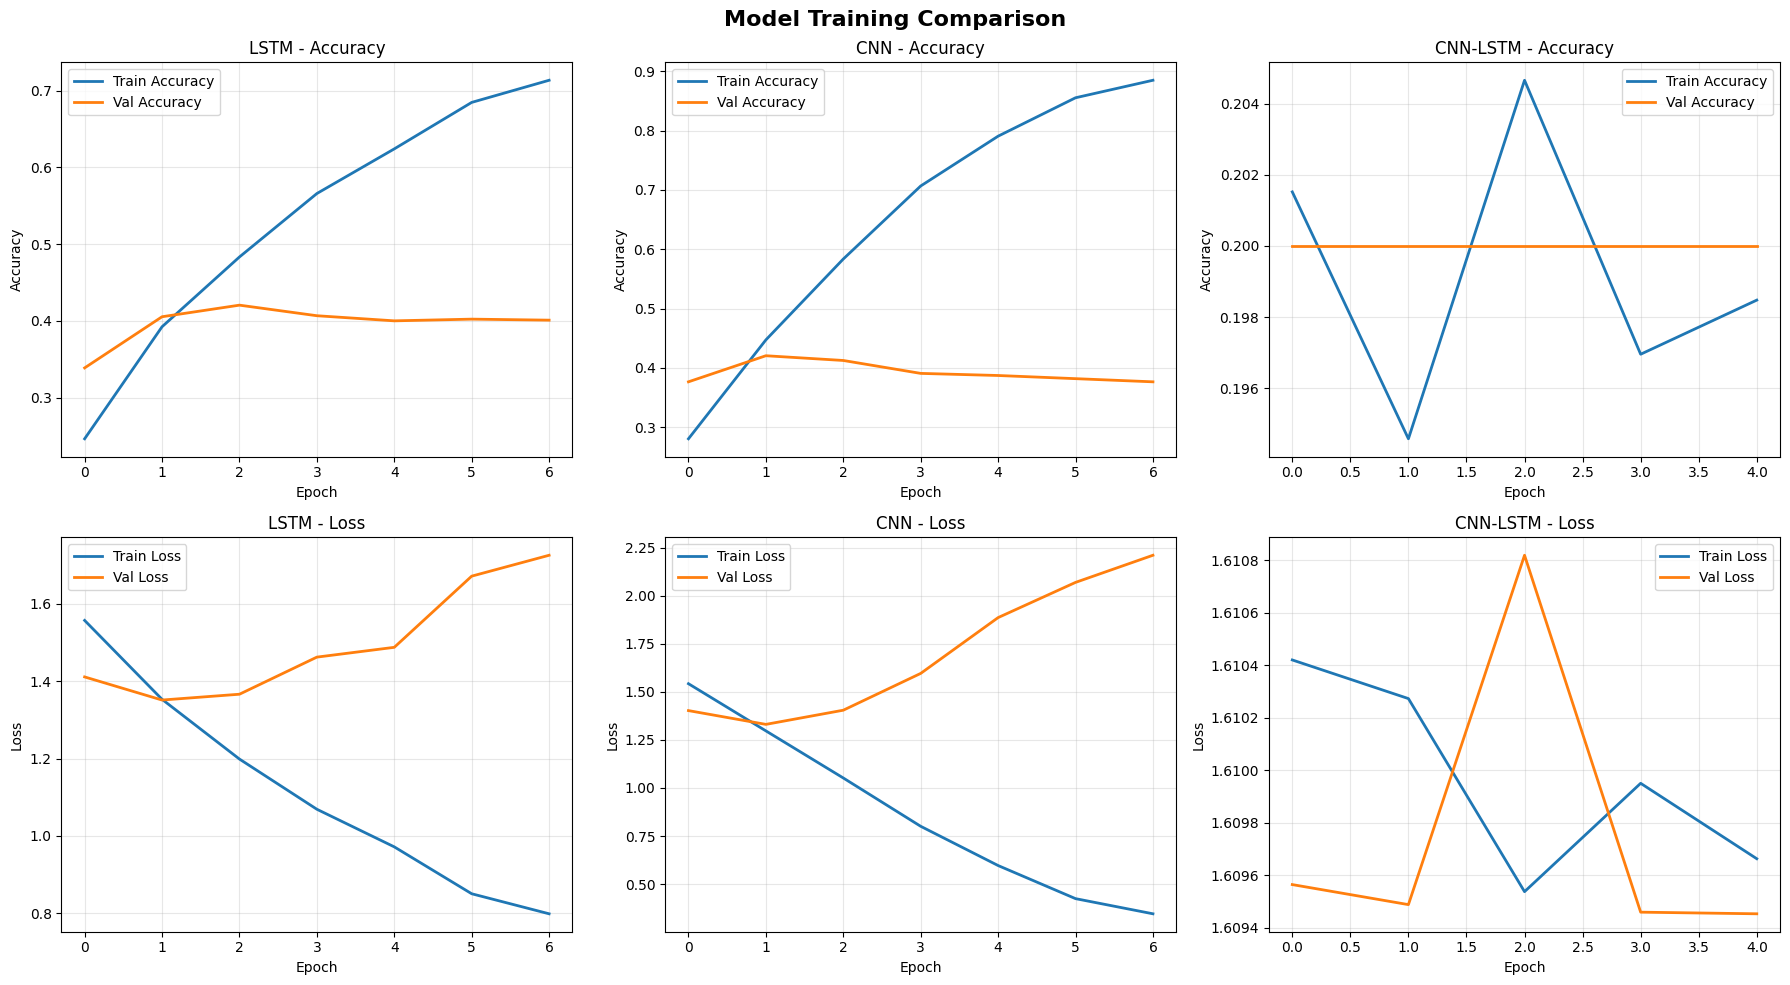


FINAL RESULTS SUMMARY
          test_loss  test_accuracy
CNN        1.389079       0.388444
LSTM       1.397228       0.375556
CNN-LSTM   1.609564       0.200000


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle

# =====================================================================
# 1. LOAD AND SPLIT DATA
# =====================================================================
df = pd.read_csv('../data/balanced_dataset/proper_balanced.csv')

X = df['Cleaned_summary']
y = df['Score']

# Convert labels to 0-4 range (for model training)
y = y - 1  # Score 1-5 becomes 0-4

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")

# =====================================================================
# 2. TOKENIZATION AND PADDING
# =====================================================================
MAX_WORDS = 10000  # Vocabulary size
MAX_LEN = 100      # Maximum sequence length

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

print(f"\nTokenization complete!")
print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Training data shape: {X_train_pad.shape}")

# =====================================================================
# 3. MODEL ARCHITECTURES
# =====================================================================

def create_lstm_model():
    """Bidirectional LSTM Model"""
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_model():
    """CNN Model for Text Classification"""
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_lstm_model():
    """Hybrid CNN-LSTM Model"""
    model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# =====================================================================
# 4. TRAINING CONFIGURATION
# =====================================================================
EPOCHS = 30
BATCH_SIZE = 64

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)

# =====================================================================
# 5. TRAIN AND EVALUATE MODELS
# =====================================================================
models_config = {
    'LSTM': create_lstm_model(),
    'CNN': create_cnn_model(),
    'CNN-LSTM': create_cnn_lstm_model()
}

results = {}
histories = {}

for name, model in models_config.items():
    print(f"\n{'='*60}")
    print(f"Training {name} Model")
    print('='*60)
    
    model_checkpoint = ModelCheckpoint(
        f'../models/{name}_model.h5', 
        monitor='val_accuracy', 
        save_best_only=True, 
        verbose=1
    )
    
    history = model.fit(
        X_train_pad, y_train_cat,
        validation_data=(X_val_pad, y_val_cat),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early_stopping, reduce_lr, model_checkpoint],
        verbose=1
    )
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test_pad, y_test_cat, verbose=0)
    results[name] = {'test_loss': test_loss, 'test_accuracy': test_acc}
    histories[name] = history.history
    
    print(f"\n{name} Test Accuracy: {test_acc:.4f}")

# =====================================================================
# 6. SELECT AND SAVE BEST MODEL
# =====================================================================
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\n{'='*60}")
print(f"🏆 Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print('='*60)

# Load and save the best model as Model_A
best_model = models_config[best_model_name]
best_model.load_weights(f'../models/{best_model_name}_model.h5')
best_model.save('../models/Model_A.h5')

# Save tokenizer
with open('../models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save model metadata
metadata = {
    'model_type': best_model_name,
    'max_words': MAX_WORDS,
    'max_len': MAX_LEN,
    'test_accuracy': results[best_model_name]['test_accuracy'],
    'test_loss': results[best_model_name]['test_loss']
}

with open('../models/model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print("\n✅ Model_A saved successfully!")
print("📁 Files saved:")
print("   - ../models/Model_A.h5")
print("   - ../models/tokenizer.pkl")
print("   - ../models/model_metadata.pkl")

# =====================================================================
# 7. VISUALIZE TRAINING HISTORY
# =====================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Training Comparison', fontsize=16, fontweight='bold')

for idx, (name, history) in enumerate(histories.items()):
    # Accuracy plot
    axes[0, idx].plot(history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, idx].plot(history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, idx].set_title(f'{name} - Accuracy')
    axes[0, idx].set_xlabel('Epoch')
    axes[0, idx].set_ylabel('Accuracy')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)
    
    # Loss plot
    axes[1, idx].plot(history['loss'], label='Train Loss', linewidth=2)
    axes[1, idx].plot(history['val_loss'], label='Val Loss', linewidth=2)
    axes[1, idx].set_title(f'{name} - Loss')
    axes[1, idx].set_xlabel('Epoch')
    axes[1, idx].set_ylabel('Loss')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../models/training_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =====================================================================
# 8. PRINT FINAL RESULTS TABLE
# =====================================================================
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('test_accuracy', ascending=False)
print(results_df.to_string())
print("="*60)

TEST

🧪 MODEL_B TESTING ON BALANCED DATASET

📂 Loading balanced test data...
✅ Test samples: 2250

📊 Test set class distribution:
   1 Stars: 450 samples (20.0%)
   2 Stars: 450 samples (20.0%)
   3 Stars: 450 samples (20.0%)
   4 Stars: 450 samples (20.0%)
   5 Stars: 450 samples (20.0%)

📥 LOADING MODEL_B
Loading model from: ../models/B/Model_B.h5


✅ Model loaded successfully
Loading tokenizer from: ../models/B/tokenizer_model_b.pkl
✅ Tokenizer loaded successfully

📋 Model Configuration:
MODEL_B Configuration
Architecture: BiLSTM
Vocabulary Size: 7953
Max Sequence Length: 100
Embedding Dimension: 128

Performance Metrics:
Test Accuracy: 0.3940
F1 Weighted: 0.3935
F1 Macro: 0.3910


🏗️ Model Architecture:


Model: "BiLSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (64, 100, 128)         │     1,017,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (64, 100, 128)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (64, 100, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (64, 100, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (64, 64)               │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (64, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 5)                │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160,263 (4.43 MB)

 Trainable params: 1,160,261 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


🔤 PREPROCESSING TEST DATA
✅ Test sequences shape: (2250, 100)
✅ Vocabulary size: 7953
✅ Max sequence length: 100

🔮 MAKING PREDICTIONS
Generating predictions...
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
✅ Predictions complete

📊 MODEL PERFORMANCE EVALUATION

🎯 Overall Metrics:
   Accuracy:           0.3684 (36.84%)
   Precision (Weighted): 0.3817
   Recall (Weighted):    0.3684
   F1 Score (Weighted):  0.3697
   F1 Score (Macro):     0.3697

📈 CLASSIFICATION REPORT

              precision    recall  f1-score   support

      1 Star     0.5367    0.3733    0.4404       450
     2 Stars     0.2579    0.3444    0.2950       450
     3 Stars     0.2980    0.2311    0.2603       450
     4 Stars     0.3273    0.3622    0.3439       450
     5 Stars     0.4888    0.5311    0.5091       450

    accuracy                         0.3684      2250
   macro avg     0.3817    0.3684    0.3697      2250
weighted avg     0.3817    0.3684    0.3697      2250


🔢 CONFUSION MATRIX

Confusion Matrix:
[[

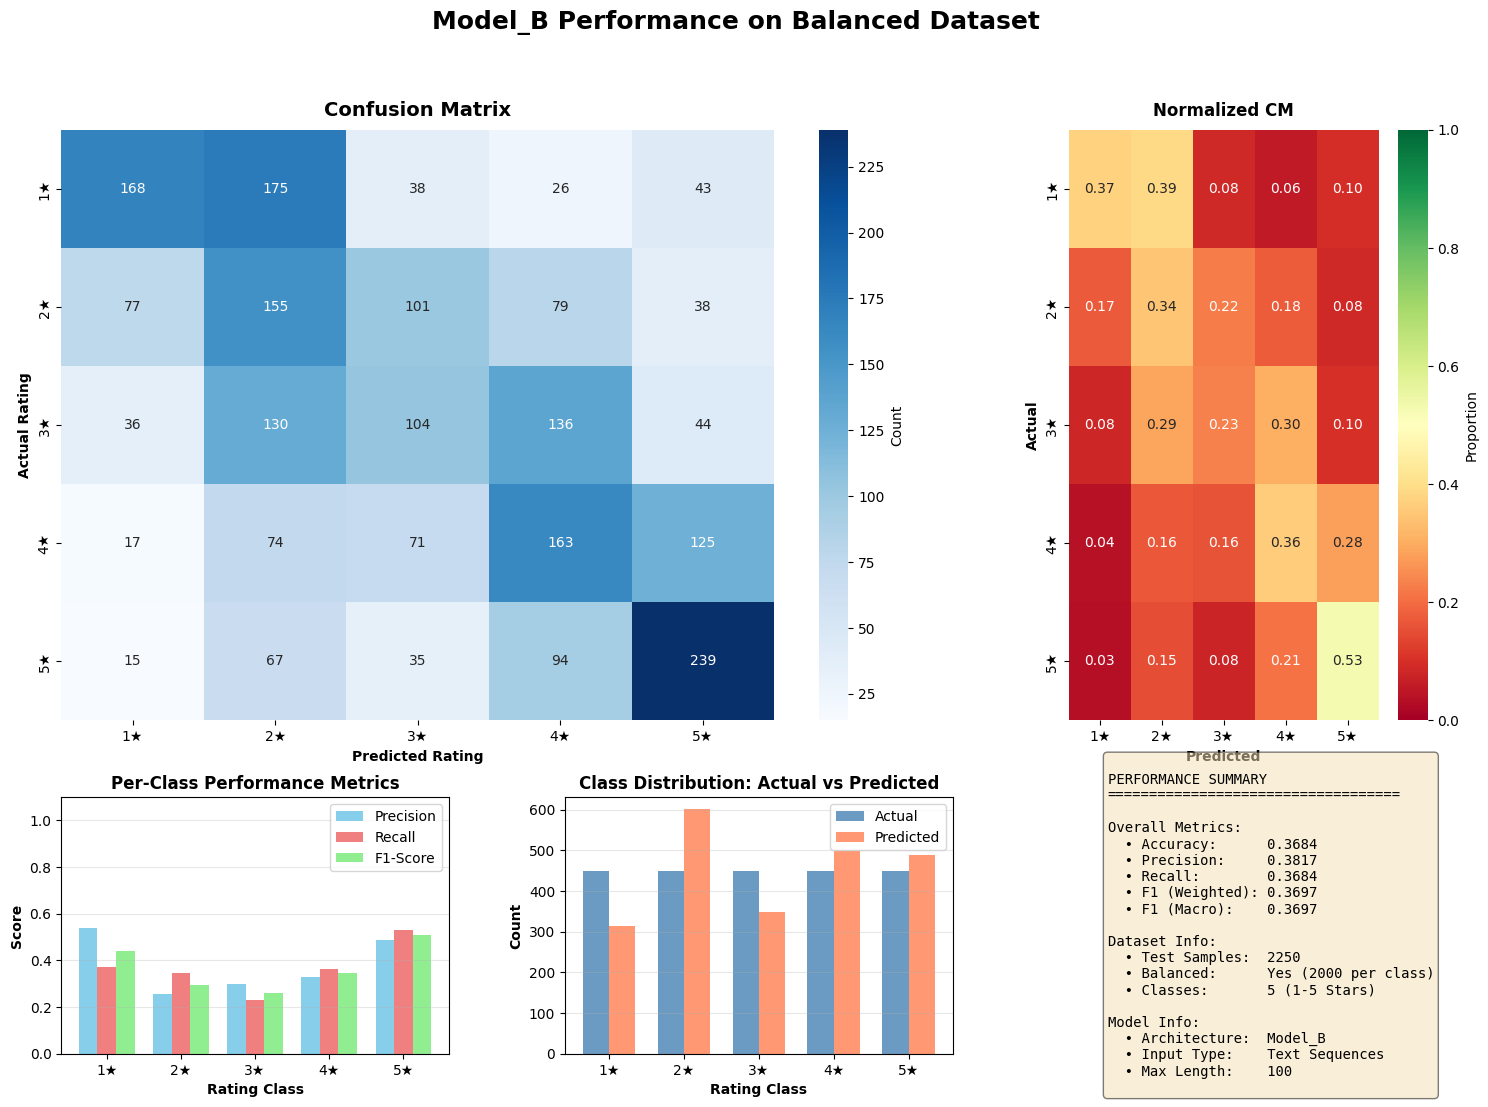


🎲 PREDICTION CONFIDENCE ANALYSIS

📊 Confidence Statistics:
   Mean Confidence:    0.3992
   Median Confidence:  0.3633
   Min Confidence:     0.2163
   Max Confidence:     0.7869

📈 Confidence Distribution:
   High (>0.8):   0 (0.0%)
   Medium (0.5-0.8): 430 (19.1%)
   Low (≤0.5):    1820 (80.9%)

🔍 SAMPLE PREDICTIONS

✅ Correct Predictions (High Confidence):

❌ Incorrect Predictions:

Text: organic natural despite search organic food coloring...
Actual: 1★ | Predicted: 4★ | Confidence: 0.2302

Text: great hibiscus based tea...
Actual: 4★ | Predicted: 5★ | Confidence: 0.4688

Text: carry around small stick...
Actual: 5★ | Predicted: 2★ | Confidence: 0.3367

💾 SAVING RESULTS
✅ Predictions saved to: ../models/model_b_balanced_predictions.csv
✅ Summary saved to: ../models/model_b_balanced_summary.txt

✅ TESTING COMPLETE

🎯 Model_B Performance on Balanced Dataset:
   Test Accuracy:      0.3684 (36.84%)
   F1 Score (Weighted): 0.3697
   F1 Score (Macro):   0.3697

📦 Files saved:
   • Visua

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    accuracy_score, precision_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("=" * 80)
print("🧪 MODEL_B TESTING ON BALANCED DATASET")
print("=" * 80)

# ============================================================================
# 1. LOAD BALANCED TEST DATA
# ============================================================================
print("\n📂 Loading balanced test data...")
df = pd.read_csv('../data/balanced_dataset/proper_balanced.csv')

# Split the data
from sklearn.model_selection import train_test_split

X = df['Cleaned_summary']
y = df['Score']

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Convert to arrays
X_test = X_test.values
y_test = y_test.values - 1  # Convert to 0-4 for neural networks

print(f"✅ Test samples: {len(X_test)}")
print(f"\n📊 Test set class distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for score, count in zip(unique, counts):
    print(f"   {score+1} Stars: {count} samples ({count/len(y_test)*100:.1f}%)")

# ============================================================================
# 2. LOAD MODEL_B AND TOKENIZER
# ============================================================================
print("\n" + "=" * 80)
print("📥 LOADING MODEL_B")
print("=" * 80)

# Load the saved model
model_b_path = '../models/B/Model_B.h5'
print(f"Loading model from: {model_b_path}")
model_b = load_model(model_b_path)
print("✅ Model loaded successfully")

# Load tokenizer
tokenizer_path = '../models/B/tokenizer_model_b.pkl'
print(f"Loading tokenizer from: {tokenizer_path}")
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)
print("✅ Tokenizer loaded successfully")

# Load configuration
config_path = '../models/B/model_b_config.txt'
print(f"\n📋 Model Configuration:")
try:
    with open(config_path, 'r') as f:
        config = f.read()
        print(config)
except:
    print("   Configuration file not found")

# Display model summary
print("\n🏗️ Model Architecture:")
model_b.summary()

# ============================================================================
# 3. PREPROCESS TEST DATA
# ============================================================================
print("\n" + "=" * 80)
print("🔤 PREPROCESSING TEST DATA")
print("=" * 80)

# Get MAX_LEN from config or use default
MAX_LEN = 100  # Should match training configuration

# Convert texts to sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"✅ Test sequences shape: {X_test_pad.shape}")
print(f"✅ Vocabulary size: {len(tokenizer.word_index) + 1}")
print(f"✅ Max sequence length: {MAX_LEN}")

# ============================================================================
# 4. MAKE PREDICTIONS
# ============================================================================
print("\n" + "=" * 80)
print("🔮 MAKING PREDICTIONS")
print("=" * 80)

# Get predictions
print("Generating predictions...")
y_pred_proba = model_b.predict(X_test_pad, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)

print("✅ Predictions complete")

# ============================================================================
# 5. EVALUATE MODEL PERFORMANCE
# ============================================================================
print("\n" + "=" * 80)
print("📊 MODEL PERFORMANCE EVALUATION")
print("=" * 80)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1_weighted = f1_score(y_test, y_pred, average='weighted')
test_f1_macro = f1_score(y_test, y_pred, average='macro')

print("\n🎯 Overall Metrics:")
print(f"   Accuracy:           {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Precision (Weighted): {test_precision:.4f}")
print(f"   Recall (Weighted):    {test_recall:.4f}")
print(f"   F1 Score (Weighted):  {test_f1_weighted:.4f}")
print(f"   F1 Score (Macro):     {test_f1_macro:.4f}")

# ============================================================================
# 6. DETAILED CLASSIFICATION REPORT
# ============================================================================
print("\n" + "=" * 80)
print("📈 CLASSIFICATION REPORT")
print("=" * 80)

target_names = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print("\n" + report)

# Get classification report as dictionary for further analysis
report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# ============================================================================
# 7. CONFUSION MATRIX
# ============================================================================
print("\n" + "=" * 80)
print("🔢 CONFUSION MATRIX")
print("=" * 80)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Calculate per-class accuracy
print("\n📊 Per-Class Accuracy:")
for i in range(5):
    class_acc = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"   {i+1} Star: {class_acc:.4f} ({class_acc*100:.2f}%)")

# ============================================================================
# 8. VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("📊 GENERATING VISUALIZATIONS")
print("=" * 80)

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('Model_B Performance on Balanced Dataset', fontsize=18, fontweight='bold', y=0.98)

# 1. Confusion Matrix Heatmap (Large)
ax1 = fig.add_subplot(gs[0:2, 0:2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['1★', '2★', '3★', '4★', '5★'],
            yticklabels=['1★', '2★', '3★', '4★', '5★'],
            cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix', fontweight='bold', fontsize=14, pad=10)
ax1.set_xlabel('Predicted Rating', fontweight='bold')
ax1.set_ylabel('Actual Rating', fontweight='bold')

# 2. Normalized Confusion Matrix
ax2 = fig.add_subplot(gs[0:2, 2])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax2,
            xticklabels=['1★', '2★', '3★', '4★', '5★'],
            yticklabels=['1★', '2★', '3★', '4★', '5★'],
            vmin=0, vmax=1, cbar_kws={'label': 'Proportion'})
ax2.set_title('Normalized CM', fontweight='bold', fontsize=12, pad=10)
ax2.set_xlabel('Predicted', fontweight='bold')
ax2.set_ylabel('Actual', fontweight='bold')

# 3. Per-Class Metrics
ax3 = fig.add_subplot(gs[2, 0])
metrics_df = pd.DataFrame({
    'Class': ['1★', '2★', '3★', '4★', '5★'],
    'Precision': [report_dict[name]['precision'] for name in target_names],
    'Recall': [report_dict[name]['recall'] for name in target_names],
    'F1-Score': [report_dict[name]['f1-score'] for name in target_names]
})

x = np.arange(len(metrics_df))
width = 0.25

bars1 = ax3.bar(x - width, metrics_df['Precision'], width, label='Precision', color='skyblue')
bars2 = ax3.bar(x, metrics_df['Recall'], width, label='Recall', color='lightcoral')
bars3 = ax3.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='lightgreen')

ax3.set_xlabel('Rating Class', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('Per-Class Performance Metrics', fontweight='bold', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_df['Class'])
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim([0, 1.1])

# 4. Class Distribution Comparison
ax4 = fig.add_subplot(gs[2, 1])
actual_counts = np.bincount(y_test, minlength=5)
predicted_counts = np.bincount(y_pred, minlength=5)

x = np.arange(5)
width = 0.35

bars1 = ax4.bar(x - width/2, actual_counts, width, label='Actual', color='steelblue', alpha=0.8)
bars2 = ax4.bar(x + width/2, predicted_counts, width, label='Predicted', color='coral', alpha=0.8)

ax4.set_xlabel('Rating Class', fontweight='bold')
ax4.set_ylabel('Count', fontweight='bold')
ax4.set_title('Class Distribution: Actual vs Predicted', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(['1★', '2★', '3★', '4★', '5★'])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Metrics Summary
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')

metrics_text = f"""
PERFORMANCE SUMMARY
{'='*35}

Overall Metrics:
  • Accuracy:      {test_accuracy:.4f}
  • Precision:     {test_precision:.4f}
  • Recall:        {test_recall:.4f}
  • F1 (Weighted): {test_f1_weighted:.4f}
  • F1 (Macro):    {test_f1_macro:.4f}

Dataset Info:
  • Test Samples:  {len(y_test)}
  • Balanced:      Yes (2000 per class)
  • Classes:       5 (1-5 Stars)

Model Info:
  • Architecture:  Model_B
  • Input Type:    Text Sequences
  • Max Length:    {MAX_LEN}
"""

ax5.text(0.1, 0.5, metrics_text, fontsize=10, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', 
         facecolor='wheat', alpha=0.5))

plt.tight_layout()

# Save visualization
viz_path = '../models/model_b_balanced_test_results.png'
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"✅ Visualization saved to: {viz_path}")
plt.show()

# ============================================================================
# 9. PREDICTION CONFIDENCE ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("🎲 PREDICTION CONFIDENCE ANALYSIS")
print("=" * 80)

# Get prediction confidence (max probability)
prediction_confidence = np.max(y_pred_proba, axis=1)

print(f"\n📊 Confidence Statistics:")
print(f"   Mean Confidence:    {prediction_confidence.mean():.4f}")
print(f"   Median Confidence:  {np.median(prediction_confidence):.4f}")
print(f"   Min Confidence:     {prediction_confidence.min():.4f}")
print(f"   Max Confidence:     {prediction_confidence.max():.4f}")

# Confidence distribution
high_conf = np.sum(prediction_confidence > 0.8)
med_conf = np.sum((prediction_confidence > 0.5) & (prediction_confidence <= 0.8))
low_conf = np.sum(prediction_confidence <= 0.5)

print(f"\n📈 Confidence Distribution:")
print(f"   High (>0.8):   {high_conf} ({high_conf/len(y_test)*100:.1f}%)")
print(f"   Medium (0.5-0.8): {med_conf} ({med_conf/len(y_test)*100:.1f}%)")
print(f"   Low (≤0.5):    {low_conf} ({low_conf/len(y_test)*100:.1f}%)")

# ============================================================================
# 10. SAMPLE PREDICTIONS
# ============================================================================
print("\n" + "=" * 80)
print("🔍 SAMPLE PREDICTIONS")
print("=" * 80)

# Show some sample predictions
print("\n✅ Correct Predictions (High Confidence):")
correct_mask = (y_test == y_pred)
high_conf_correct = np.where(correct_mask & (prediction_confidence > 0.9))[0][:3]

for idx in high_conf_correct:
    print(f"\nText: {X_test[idx][:100]}...")
    print(f"Actual: {y_test[idx]+1}★ | Predicted: {y_pred[idx]+1}★ | Confidence: {prediction_confidence[idx]:.4f}")

print("\n❌ Incorrect Predictions:")
incorrect_mask = (y_test != y_pred)
incorrect_indices = np.where(incorrect_mask)[0][:3]

for idx in incorrect_indices:
    print(f"\nText: {X_test[idx][:100]}...")
    print(f"Actual: {y_test[idx]+1}★ | Predicted: {y_pred[idx]+1}★ | Confidence: {prediction_confidence[idx]:.4f}")

# ============================================================================
# 11. SAVE RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("💾 SAVING RESULTS")
print("=" * 80)

# Save detailed results to CSV
results_df = pd.DataFrame({
    'Text': X_test,
    'Actual_Rating': y_test + 1,
    'Predicted_Rating': y_pred + 1,
    'Confidence': prediction_confidence,
    'Correct': y_test == y_pred
})

results_path = '../models/model_b_balanced_predictions.csv'
results_df.to_csv(results_path, index=False)
print(f"✅ Predictions saved to: {results_path}")

# Save metrics summary
summary_path = '../models/model_b_balanced_summary.txt'
with open(summary_path, 'w') as f:
    f.write("MODEL_B TESTING ON BALANCED DATASET\n")
    f.write("=" * 50 + "\n\n")
    f.write("OVERALL METRICS:\n")
    f.write(f"  Accuracy:           {test_accuracy:.4f}\n")
    f.write(f"  Precision (Weighted): {test_precision:.4f}\n")
    f.write(f"  Recall (Weighted):    {test_recall:.4f}\n")
    f.write(f"  F1 Score (Weighted):  {test_f1_weighted:.4f}\n")
    f.write(f"  F1 Score (Macro):     {test_f1_macro:.4f}\n\n")
    f.write("CLASSIFICATION REPORT:\n")
    f.write(report)
    f.write("\n\nCONFUSION MATRIX:\n")
    f.write(str(cm))
print(f"✅ Summary saved to: {summary_path}")

# ============================================================================
# 12. FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("✅ TESTING COMPLETE")
print("=" * 80)
print(f"\n🎯 Model_B Performance on Balanced Dataset:")
print(f"   Test Accuracy:      {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   F1 Score (Weighted): {test_f1_weighted:.4f}")
print(f"   F1 Score (Macro):   {test_f1_macro:.4f}")
print(f"\n📦 Files saved:")
print(f"   • Visualization:  {viz_path}")
print(f"   • Predictions:    {results_path}")
print(f"   • Summary:        {summary_path}")
print("\n" + "=" * 80)